<a href="https://colab.research.google.com/github/solomonmelwin/CODSOFT/blob/main/waterbirds%20detection%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
from google.colab import files
files.upload()  # Manually upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"solomonmelwin2002","key":"ae9ec59b0eef4408f540fe925d233805"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle


In [ ]:
!kaggle datasets download -d solomonmelwin2002/waterbirds
!unzip -q /content/waterbirds.zip -d /content/bird-dataset


Dataset URL: https://www.kaggle.com/datasets/solomonmelwin2002/waterbirds
License(s): CC0-1.0
 99% 479M/483M [00:15<00:00, 33.9MB/s]
100% 483M/483M [00:15<00:00, 32.1MB/s]


In [ ]:
import os
import shutil
import random

# Paths
dataset_path = "/content/bird-dataset/waterbirds"  # Change this to your dataset path
output_path = "/content/bird-dataset-split"  # Output path for split dataset

# Train-Test-Val Split Ratios
train_ratio = 0.70
test_ratio = 0.15
val_ratio = 0.15

# Ensure output directories exist
for split in ["train", "test", "val"]:
    os.makedirs(os.path.join(output_path, split), exist_ok=True)

# Process each species
for species in os.listdir(dataset_path):
    species_path = os.path.join(dataset_path, species)
    if not os.path.isdir(species_path):
        continue  # Skip if not a directory

    images = os.listdir(species_path)
    random.shuffle(images)  # Shuffle images randomly

    # Split indices
    train_split = int(len(images) * train_ratio)
    test_split = train_split + int(len(images) * test_ratio)

    # Assign images to respective splits
    splits = {
        "train": images[:train_split],
        "test": images[train_split:test_split],
        "val": images[test_split:]
    }

    # Move images to respective folders
    for split, img_list in splits.items():
        species_split_path = os.path.join(output_path, split, species)
        os.makedirs(species_split_path, exist_ok=True)  # Create species folder

        for img in img_list:
            src_path = os.path.join(species_path, img)
            dst_path = os.path.join(species_split_path, img)
            shutil.copy(src_path, dst_path)  # Copy image

print("✅ Dataset successfully split into Train (70%), Test (15%), and Val (15%)!")


✅ Dataset successfully split into Train (70%), Test (15%), and Val (15%)!


In [ ]:
import os

output_path = "/content/bird-dataset-split"  # Change this if needed

for split in ["train", "test", "val"]:
    total_images = 0
    print(f"\n🔍 Checking '{split}' split:")

    for species in os.listdir(os.path.join(output_path, split)):
        species_path = os.path.join(output_path, split, species)
        num_images = len(os.listdir(species_path))
        total_images += num_images
        print(f"  📌 {species}: {num_images} images")

    print(f"✅ Total images in {split}: {total_images}")



🔍 Checking 'train' split:
  📌 Indian Spot-billed Duck: 939 images
  📌 Fulvous Whistling Duck: 937 images
  📌 Lesser Whistling Duck: 940 images
  📌 Bar-headed Goose: 940 images
  📌 spot billed pelican: 940 images
  📌 Eurasian Wigeon: 940 images
  📌 Northern Pintail: 939 images
  📌 eurasian spoonbill: 940 images
  📌 Common Pochard: 940 images
  📌 glossy ibis: 940 images
  📌 Green-winged Teal: 939 images
  📌 greater flamingo: 938 images
  📌 Knob-billed Duck: 938 images
  📌 Graganey: 939 images
  📌 great white pelican: 940 images
  📌 painted stork: 940 images
  📌 asian openbill: 884 images
  📌 Tufted Duck: 939 images
  📌 Northern Shoveler: 939 images
  📌 black headed ibis: 940 images
✅ Total images in train: 18731

🔍 Checking 'test' split:
  📌 Indian Spot-billed Duck: 201 images
  📌 Fulvous Whistling Duck: 201 images
  📌 Lesser Whistling Duck: 201 images
  📌 Bar-headed Goose: 201 images
  📌 spot billed pelican: 201 images
  📌 Eurasian Wigeon: 201 images
  📌 Northern Pintail: 201 images
  

📌 Train Set Samples:


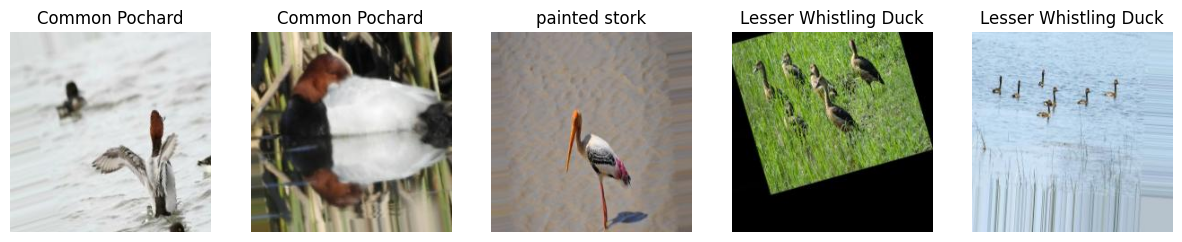


📌 Test Set Samples:


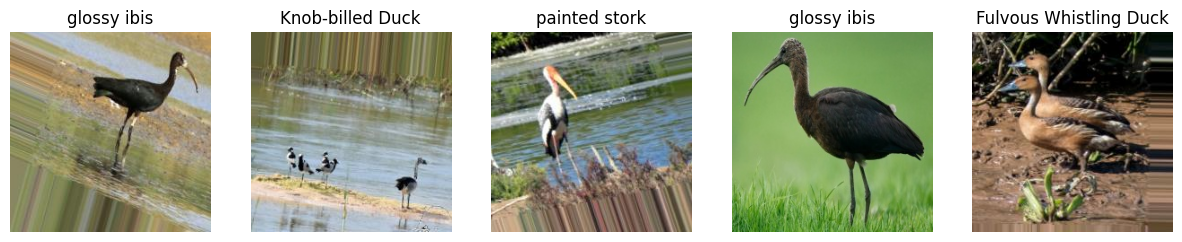


📌 Validation Set Samples:


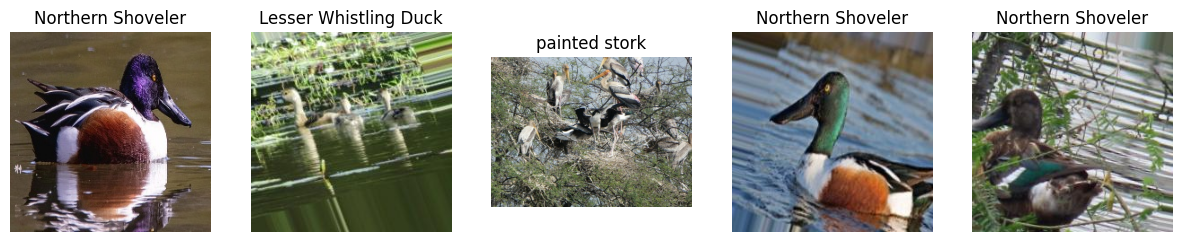

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def show_random_images(split, num_images=5):
    split_path = os.path.join(output_path, split)
    species_list = os.listdir(split_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        species = random.choice(species_list)
        species_path = os.path.join(split_path, species)
        image_name = random.choice(os.listdir(species_path))
        image_path = os.path.join(species_path, image_name)

        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(species)

    plt.show()

# Show images from each split
print("📌 Train Set Samples:")
show_random_images("train")

print("\n📌 Test Set Samples:")
show_random_images("test")

print("\n📌 Validation Set Samples:")
show_random_images("val")


In [ ]:
import cv2
import os
import shutil
import numpy as np

dataset_path = "/content/bird-dataset-split"  # Change this to your dataset path
blurry_threshold = 100  # Lower = more blur removed

def is_blurry(image_path, threshold=blurry_threshold):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()  # Compute variance
    return laplacian_var < threshold  # True if blurry

def remove_blurry_images(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            if is_blurry(file_path):
                os.remove(file_path)  # Delete blurry image
                removed += 1
    print(f"✅ Removed {removed} blurry images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_blurry_images(os.path.join(dataset_path, split))


✅ Removed 1109 blurry images from /content/bird-dataset-split/train
✅ Removed 230 blurry images from /content/bird-dataset-split/test
✅ Removed 240 blurry images from /content/bird-dataset-split/val


In [ ]:
def is_noisy(image_path, noise_threshold=600):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)  # Detect edges
    noise_score = np.sum(edges) / (image.shape[0] * image.shape[1])  # Edge density

    return noise_score > noise_threshold  # True if noisy

def remove_noisy_images(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            if is_noisy(file_path):
                os.remove(file_path)
                removed += 1
    print(f"✅ Removed {removed} noisy images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_noisy_images(os.path.join(dataset_path, split))


✅ Removed 0 noisy images from /content/bird-dataset-split/train
✅ Removed 0 noisy images from /content/bird-dataset-split/test
✅ Removed 0 noisy images from /content/bird-dataset-split/val


In [ ]:
def is_distant(image_path, size_threshold=5000):  # Adjust size threshold as needed
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_area = max([cv2.contourArea(c) for c in contours], default=0)  # Largest detected object

    return max_area < size_threshold  # True if object is too small

def remove_distant_images(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            if is_distant(file_path):
                os.remove(file_path)
                removed += 1
    print(f"✅ Removed {removed} distant images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_distant_images(os.path.join(dataset_path, split))


✅ Removed 3496 distant images from /content/bird-dataset-split/train
✅ Removed 701 distant images from /content/bird-dataset-split/test
✅ Removed 752 distant images from /content/bird-dataset-split/val


In [ ]:
import os
import hashlib
from PIL import Image

dataset_path = "/content/bird-dataset-split"  # Change to your dataset path
hashes = {}  # Dictionary to store image hashes

def compute_hash(image_path):
    """Compute SHA-256 hash of an image."""
    with Image.open(image_path) as img:
        img = img.convert("L").resize((128, 128))  # Convert to grayscale and resize
        return hashlib.sha256(img.tobytes()).hexdigest()

def remove_duplicates(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            img_hash = compute_hash(file_path)

            if img_hash in hashes:
                os.remove(file_path)  # Delete duplicate
                removed += 1
            else:
                hashes[img_hash] = file_path  # Store hash

    print(f"✅ Removed {removed} duplicate images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_duplicates(os.path.join(dataset_path, split))


✅ Removed 2 duplicate images from /content/bird-dataset-split/train
✅ Removed 0 duplicate images from /content/bird-dataset-split/test
✅ Removed 0 duplicate images from /content/bird-dataset-split/val


In [ ]:
for split in ["train", "test", "val"]:
    total_images = sum(len(files) for _, _, files in os.walk(os.path.join(dataset_path, split)))
    print(f"✅ Remaining images in {split}: {total_images}")


✅ Remaining images in train: 14124
✅ Remaining images in test: 3077
✅ Remaining images in val: 3036


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset path
dataset_path = "/content/bird-dataset-split"

# Load train, validation, and test datasets
batch_size = 32  # Adjust based on memory
img_size = (224, 224)  # MobileNetV3 input size

train_dataset = image_dataset_from_directory(
    f"{dataset_path}/train",
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

val_dataset = image_dataset_from_directory(
    f"{dataset_path}/val",
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

test_dataset = image_dataset_from_directory(
    f"{dataset_path}/test",
    shuffle=False,
    batch_size=batch_size,
    image_size=img_size
)

# Check dataset class names (should be 20)
class_names = train_dataset.class_names
print(f"✅ Classes loaded: {class_names}")


Found 14124 files belonging to 20 classes.
Found 3036 files belonging to 20 classes.
Found 3077 files belonging to 20 classes.
✅ Classes loaded: ['Bar-headed Goose', 'Common Pochard', 'Eurasian Wigeon', 'Fulvous Whistling Duck', 'Graganey', 'Green-winged Teal', 'Indian Spot-billed Duck', 'Knob-billed Duck', 'Lesser Whistling Duck', 'Northern Pintail', 'Northern Shoveler', 'Tufted Duck', 'asian openbill', 'black headed ibis', 'eurasian spoonbill', 'glossy ibis', 'great white pelican', 'greater flamingo', 'painted stork', 'spot billed pelican']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset path
dataset_path = "/content/bird-dataset-split"

# Load train, validation, and test datasets
batch_size = 32  # Adjust based on memory
img_size = (224, 224)  # MobileNetV3 input size

train_dataset = image_dataset_from_directory(
    f"{dataset_path}/train",
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

val_dataset = image_dataset_from_directory(
    f"{dataset_path}/val",
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

test_dataset = image_dataset_from_directory(
    f"{dataset_path}/test",
    shuffle=False,
    batch_size=batch_size,
    image_size=img_size
)

# Check dataset class names (should be 20)
class_names = train_dataset.class_names
print(f"✅ Classes loaded: {class_names}")

# Apply Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Augment the train dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

# Load MobileNetV3 model with pre-trained ImageNet weights
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3),
    include_top=False,  # Remove the top classification layer
    weights="imagenet"
)

# Freeze the base model
base_model.trainable = False

# Add custom classifier for 20 species
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # 20 classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Show model summary
model.summary()

# Train the model without fine-tuning (initial evaluation)
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=batch_size
)

# Evaluate on test set
loss, accuracy = model.evaluate(test_dataset)
print(f"✅ Pretrained Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Now fine-tune the model by unfreezing the top layers of MobileNetV3
base_model.trainable = True

# Freeze all layers except the last 10 layers for fine-tuning
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model after unfreezing layers
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use a lower learning rate for fine-tuning
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model again with fine-tuning
history_fine_tuning = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=batch_size
)




Found 14124 files belonging to 20 classes.
Found 3036 files belonging to 20 classes.
Found 3077 files belonging to 20 classes.
✅ Classes loaded: ['Bar-headed Goose', 'Common Pochard', 'Eurasian Wigeon', 'Fulvous Whistling Duck', 'Graganey', 'Green-winged Teal', 'Indian Spot-billed Duck', 'Knob-billed Duck', 'Lesser Whistling Duck', 'Northern Pintail', 'Northern Shoveler', 'Tufted Duck', 'asian openbill', 'black headed ibis', 'eurasian spoonbill', 'glossy ibis', 'great white pelican', 'greater flamingo', 'painted stork', 'spot billed pelican']
4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,091,972 (4.17 MB)

 Trainable params: 152,852 (597.08 KB)

 Non-trainable params: 939,120 (3.58 MB)

Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 351s 779ms/step - accuracy: 0.2974 - loss: 2.3286 - val_accuracy: 0.5609 - val_loss: 1.4101
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 336s 760ms/step - accuracy: 0.5121 - loss: 1.5496 - val_accuracy: 0.5991 - val_loss: 1.2572
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 396s 790ms/step - accuracy: 0.5719 - loss: 1.3690 - val_accuracy: 0.6202 - val_loss: 1.1820
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 344s 777ms/step - accuracy: 0.6128 - loss: 1.2272 - val_accuracy: 0.6634 - val_loss: 1.0731
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 385s 784ms/step - accuracy: 0.6480 - loss: 1.1272 - val_accuracy: 0.6762 - val_loss: 0.9987
Epoch 6/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 340s 768ms/step - accuracy: 0.6705 - loss: 1.0404 - val_accuracy: 0.6970 - val_loss: 0.9392
Epoch 7/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 347s 784ms/step - accuracy: 0.6790 - loss: 1.0011 - val_accuracy: 0.7042 - val_loss: 0.8990
Epoch 8/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 372s 762ms/step - accuracy: 0.7003 -

In [ ]:
# Evaluate on test set
loss, accuracy = model.evaluate(test_dataset)
print(f"✅ Pretrained Model Accuracy on Test Set: {accuracy * 100:.2f}%")


97/97 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.8276 - loss: 0.5221
✅ Pretrained Model Accuracy on Test Set: 85.12%


In [ ]:
model.save('bird_species_model.h5')

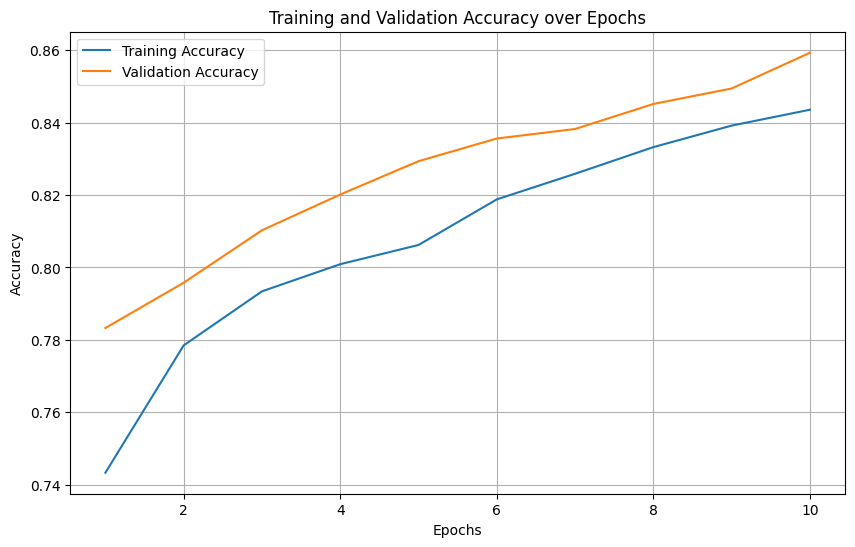

In [ ]:
import matplotlib.pyplot as plt

# Get accuracy data from the training history
train_accuracy = history_fine_tuning.history['accuracy']
val_accuracy = history_fine_tuning.history['val_accuracy']

# Plot the accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Bird Species: Bar-headed Goose


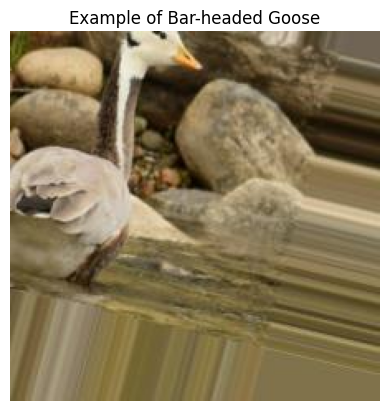

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import random
import os
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("bird_species_model.keras")  # Change to your model path

# Define class labels (Make sure these match your dataset)
class_names = ['Bar-headed Goose', 'Common Pochard', 'Eurasian Wigeon', 'Fulvous Whistling Duck', 'Graganey',
               'Green-winged Teal', 'Indian Spot-billed Duck', 'Knob-billed Duck', 'Lesser Whistling Duck',
               'Northern Pintail', 'Northern Shoveler', 'Tufted Duck', 'asian openbill', 'black headed ibis',
               'eurasian spoonbill', 'glossy ibis', 'great white pelican', 'greater flamingo',
               'painted stork', 'spot billed pelican']

# Path to dataset (update it to your dataset structure)
dataset_path = "/content/bird-dataset-split/val"  # Example: "/content/bird-dataset-yolo/test/"

# Function to preprocess input image for model
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize to MobileNetV3 input size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to display a random image from predicted class
def show_random_image(predicted_class):
    class_path = os.path.join(dataset_path, predicted_class)
    images = os.listdir(class_path)

    if len(images) > 0:
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Example of {predicted_class}")
        plt.axis("off")
        plt.show()
    else:
        print(f"No images found for class: {predicted_class}")

# Main function to predict and display result
def predict_bird(image_path):
    img = preprocess_image(image_path)
    predictions = model.predict(img)  # Predict class
    predicted_class_index = np.argmax(predictions)  # Get index of highest probability
    predicted_class = class_names[predicted_class_index]  # Get class name

    print(f"Predicted Bird Species: {predicted_class}")
    #
    # Show a random image from predicted class
    show_random_image(predicted_class)

# Example usage
image_path = "/content/image.jpeg" # Change this to your image path
predict_bird(image_path)


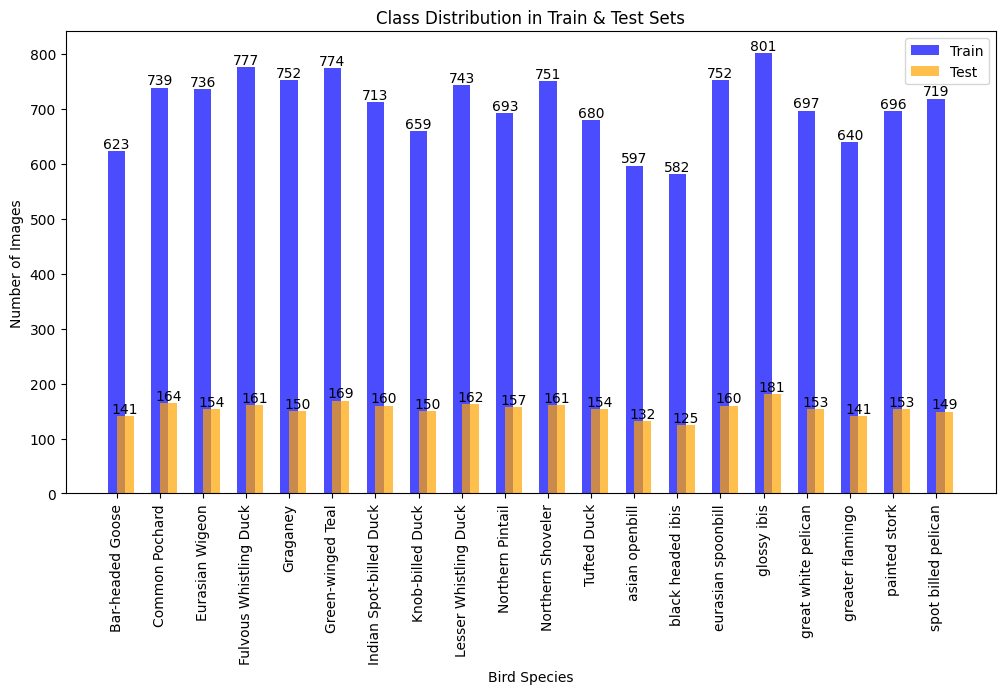

In [ ]:
import os
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = "/content/bird-dataset-split/train"
test_dir = "/content/bird-dataset-split/test"

# Function to count images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a folder
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get class distributions
train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

# Sort the classes for consistent comparison
sorted_classes = sorted(train_counts.keys())
train_values = [train_counts[c] for c in sorted_classes]
test_values = [test_counts[c] for c in sorted_classes]

# Plot class distributions
plt.figure(figsize=(12, 6))
x = range(len(sorted_classes))

bars1 = plt.bar(x, train_values, width=0.4, label="Train", align="center", alpha=0.7, color='blue')
bars2 = plt.bar(x, test_values, width=0.4, label="Test", align="edge", alpha=0.7, color='orange')

# Add count labels on top of bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Bird Species")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Train & Test Sets")
plt.xticks(x, sorted_classes, rotation=90)  # Rotate class labels for readability
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

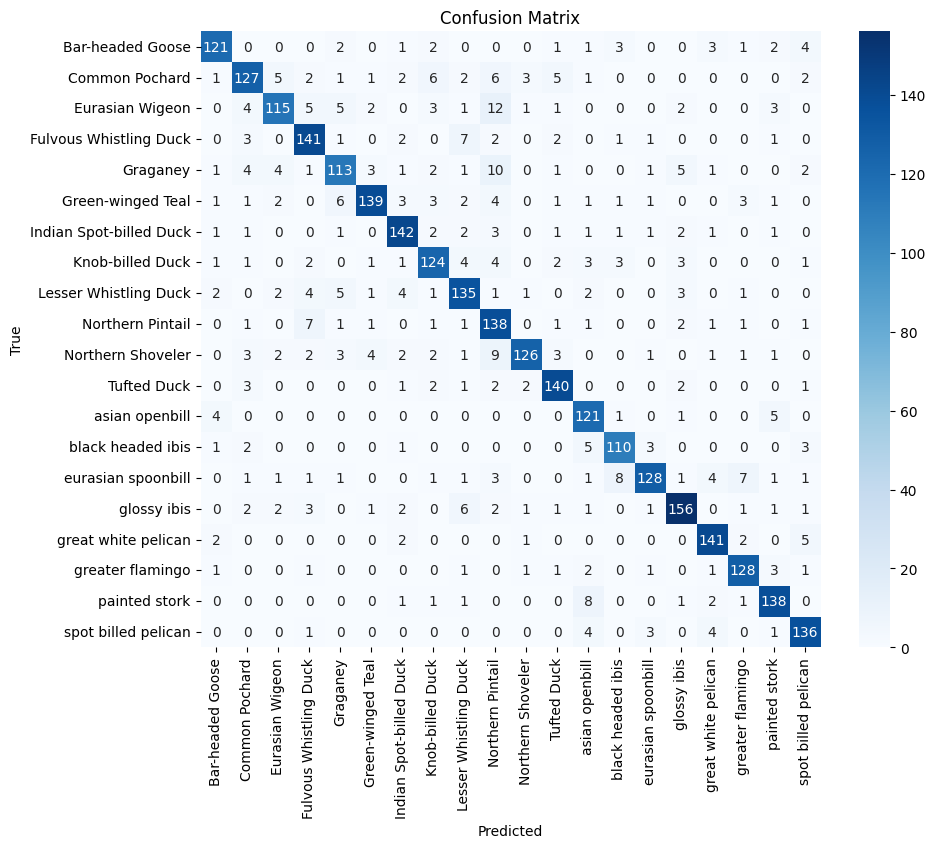

Classification Report:
                          precision    recall  f1-score   support

       Bar-headed Goose       0.89      0.86      0.87       141
         Common Pochard       0.83      0.77      0.80       164
        Eurasian Wigeon       0.86      0.75      0.80       154
 Fulvous Whistling Duck       0.83      0.88      0.85       161
               Graganey       0.81      0.75      0.78       150
      Green-winged Teal       0.91      0.82      0.86       169
Indian Spot-billed Duck       0.86      0.89      0.87       160
       Knob-billed Duck       0.83      0.83      0.83       150
  Lesser Whistling Duck       0.81      0.83      0.82       162
       Northern Pintail       0.70      0.88      0.78       157
      Northern Shoveler       0.93      0.78      0.85       161
            Tufted Duck       0.88      0.91      0.89       154
         asian openbill       0.80      0.92      0.85       132
      black headed ibis       0.86      0.88      0.87       125


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_true = []
y_pred = []

# Loop through the test dataset and get true and predicted labels
for images, labels in test_dataset:
    y_true.extend(labels.numpy())  # True labels
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted class indices

# Convert y_true and y_pred to numpy arrays for metrics calculation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

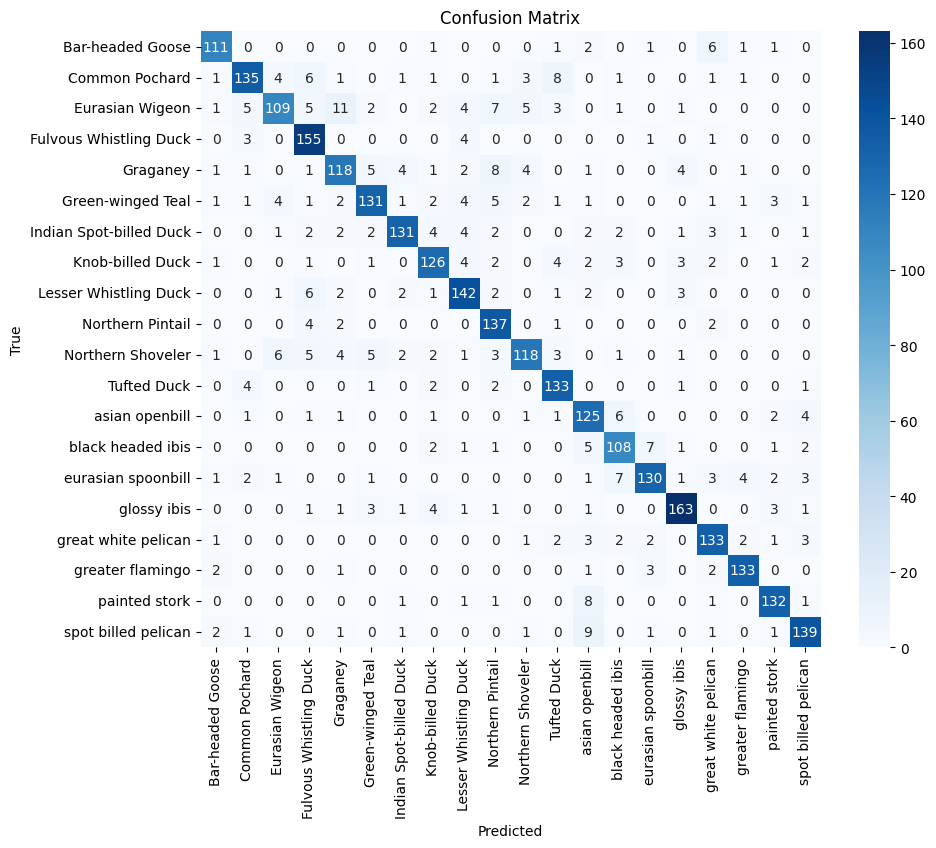

Classification Report:
                          precision    recall  f1-score   support

       Bar-headed Goose       0.90      0.90      0.90       124
         Common Pochard       0.88      0.82      0.85       164
        Eurasian Wigeon       0.87      0.70      0.77       156
 Fulvous Whistling Duck       0.82      0.95      0.88       164
               Graganey       0.81      0.78      0.79       151
      Green-winged Teal       0.87      0.81      0.84       162
Indian Spot-billed Duck       0.91      0.83      0.87       158
       Knob-billed Duck       0.85      0.83      0.84       152
  Lesser Whistling Duck       0.85      0.88      0.86       162
       Northern Pintail       0.80      0.94      0.86       146
      Northern Shoveler       0.87      0.78      0.82       152
            Tufted Duck       0.84      0.92      0.88       144
         asian openbill       0.77      0.87      0.82       143
      black headed ibis       0.82      0.84      0.83       128


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_true = []
y_pred = []

# Loop through the test dataset and get true and predicted labels
for images, labels in val_dataset:
    y_true.extend(labels.numpy())  # True labels
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted class indices

# Convert y_true and y_pred to numpy arrays for metrics calculation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)
